<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/widetable/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

In [3]:
lab0 = pd.DataFrame(lab)

## **LabSummaryDF**

In [4]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

LabSummaryDF = pd.DataFrame(lab_count)

## **LabList**

> Replace Item with List then create new table to store the value

In [5]:
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}

In [6]:
# Create new columns for labels
lab['LabelResult'] = ""
lab['LabelRequest'] = ""

# Iterate through the lab_mapping dictionary and update 'LabelResult' and 'LabelRequest' columns
for lab_name, indices in lab_mapping.items():
    result_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['ResultItemName'].tolist()
    request_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['RequestItemName'].tolist()
    lab.loc[lab['ResultItemName'].isin(result_item_names), 'LabelResult'] = lab_name
    lab.loc[lab['RequestItemName'].isin(request_item_names), 'LabelRequest'] = lab_name

In [ ]:
lab0 = pd.DataFrame(lab)

In [8]:
lab = lab[['LabNo','PatientUID', 'PatientVisitUID','CWhen','ResultItemName','RequestItemName','ResultValue', 'LabelResult', 'LabelRequest']]
lab

,LabNo,PatientUID,PatientVisitUID,CWhen,ResultItemName,RequestItemName,ResultValue,LabelResult,LabelRequest
0,1,2299,2024049,2558-02-19 16:16:51.423,Formatted Result,BMD LUMBAR,FT,lab31,lab31
1,1,2299,2024049,2558-02-19 10:32:20.907,"ALBUMIN, 32403","ALBUMIN, 32403",4.1,lab11,
2,1,2299,2024049,2558-02-19 10:32:21.610,"ALP, 32309",Alkaline Phos,44,,
3,1,2299,2024049,2558-02-19 10:32:21.390,"ALT, 32311","ALT, 32311",17,,
4,1,2299,2024049,2558-02-19 10:32:21.500,"AST, 32310","AST, 32310",23,,
...,...,...,...,...,...,...,...,...,...
21641518,938,922659,7985473,2564-08-18 15:45:10.313,DTX(POCT),Dextrostix(POCT),179,,
21641519,939,922659,7985473,2564-08-18 20:27:14.767,DTX(POCT),Dextrostix(POCT),154,,
21641520,940,922659,7985473,2564-08-19 07:42:36.180,DTX(POCT),Dextrostix(POCT),175,,
21641521,941,922659,7985473,2564-08-19 11:35:32.680,DTX(POCT),Dextrostix(POCT),167,,


## **Define**

> มันจะมี rows ที่ mapping value ไม่ตรงกัน เช่น
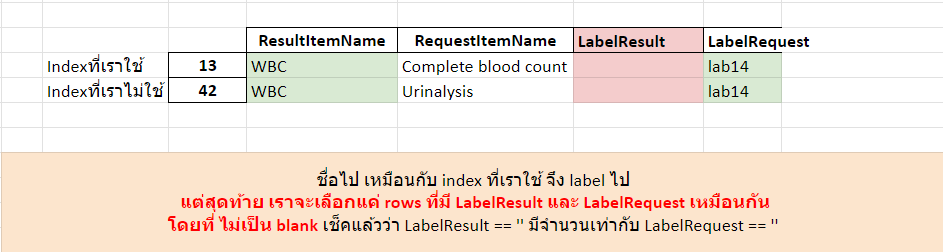

## **Recheck mapping**

In [101]:
lab[lab['LabelResult'] == 'lab32']['LabelRequest'].unique()

array(['', 'lab32'], dtype=object)

In [103]:
# fix LabSummaryDF.loc[[1, 1587]] #lab1
# LabSummaryDF.loc[[3, 129, 185, 312]] #lab2
# fix LabSummaryDF.loc[[0, 103]] #lab3
# fix LabSummaryDF.loc[[5, 115]] #lab4
# LabSummaryDF.loc[[2, 112]] #lab5
# fix LabSummaryDF.loc[[6, 118]] #lab6
# LabSummaryDF.loc[[4, 117]] #lab7
# LabSummaryDF.loc[[63, 194]] #lab8
# fix LabSummaryDF.loc[[31, 172]] #lab9
# LabSummaryDF.loc[[33, 175]] #lab10
# LabSummaryDF.loc[[33, 175]] #lab11
# fix LabSummaryDF.loc[[22, 3001]] #lab12
# fix LabSummaryDF.loc[[8, 100, 1736, 2577, 2856, 2980]] #lab13
# fix LabSummaryDF.loc[[13]] #lab14
# fix LabSummaryDF.loc[[15]] #lab15
# LabSummaryDF.loc[[159]] #lab16
# fix LabSummaryDF.loc[[198, 238, 584]] #lab17
# LabSummaryDF.loc[[154]] #lab18
# fix LabSummaryDF.loc[[30, 156, 177, 223, 277, 561]] #lab19
# fix LabSummaryDF.loc[[49, 153]] #lab20
# LabSummaryDF.loc[[23, 114]] #lab21
# LabSummaryDF.loc[[50, 130]] #lab22
# LabSummaryDF.loc[[50, 130]] #lab23
# LabSummaryDF.loc[[50, 130]] #lab24
# LabSummaryDF.loc[[220, 304, 539, 2909]] #lab25
# LabSummaryDF.loc[[191, 253]] #lab26
# LabSummaryDF.loc[[163]] #lab27
# fix LabSummaryDF.loc[[108,397,73,305]] #lab28
# LabSummaryDF.loc[[176, 2796]] #lab29
# LabSummaryDF.loc[[218, 949]] #lab30
# LabSummaryDF.loc[[233, 1424]] #lab31
# LabSummaryDF.loc[[182, 473]] #lab32
# lab[(lab['LabelResult']== 'lab31') & (lab['LabelRequest'] == 'lab29')]

In [104]:
lab.loc[(lab['LabelResult'] == 'lab1') & (lab['LabelRequest'] == 'lab3'), 'LabelRequest'] = 'lab1' #L1
lab.loc[(lab['LabelResult'] == 'lab3') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab3' #L3
lab.loc[(lab['LabelResult'] == 'lab4') & (lab['LabelRequest'] == 'lab2'), 'LabelRequest'] = 'lab4' #L4
lab.loc[(lab['LabelResult'] == 'lab6') & (lab['LabelRequest'] == 'lab28'), 'LabelRequest'] = 'lab6' #L6
lab.loc[(lab['LabelResult'] == 'lab9') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab9' #L9
lab.loc[(lab['LabelResult'] == 'lab12') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab12' #L12
lab.loc[(lab['LabelResult'] == 'lab13') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab13' #L13
lab.loc[(lab['LabelResult'] == 'lab13') & (lab['LabelRequest'] == 'lab28'), 'LabelRequest'] = 'lab13' #L13
lab.loc[(lab['LabelResult'] == 'lab14') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab14' #L14
lab.loc[(lab['LabelResult'] == 'lab15') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab15' #L15
lab.loc[(lab['LabelResult'] == 'lab17') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab17' #L17
lab.loc[(lab['LabelResult'] == 'lab19') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab19' #L19
lab.loc[(lab['LabelResult'] == 'lab20') & (lab['LabelRequest'] == 'lab30'), 'LabelRequest'] = 'lab20' #L20
lab.loc[(lab['LabelResult'] == 'lab20') & (lab['LabelRequest'] == 'lab28'), 'LabelRequest'] = 'lab20' #L20
lab.loc[(lab['LabelResult'] == 'lab21') & (lab['LabelRequest'] == 'lab7'), 'LabelRequest'] = 'lab21' #L21
lab.loc[(lab['LabelResult'] == 'lab28') & (lab['LabelRequest'] == 'lab13'), 'LabelRequest'] = 'lab28' #L28

In [105]:
lab = lab[(lab['LabelResult'] != '') & (lab['LabelRequest'] != '')]
lab = lab[(lab['LabelResult'] == lab['LabelRequest'])]
lab.head()

,LabNo,PatientUID,PatientVisitUID,CWhen,ResultItemName,RequestItemName,ResultValue,LabelResult,LabelRequest
0,1,2299,2024049,2558-02-19 16:16:51.423,Formatted Result,BMD LUMBAR,FT,lab31,lab31
6,1,2299,2024049,2558-02-19 10:32:21.717,"CALCIUM, 32106","CALCIUM, 32106",9.4,lab27,lab27
9,1,2299,2024049,2558-02-19 10:32:21.280,"DIRECT BILIRUBIN, 32207","DIRECT BILIRUBIN, 32207",0.1,lab26,lab26
10,1,2299,2024049,2558-02-19 10:32:21.030,GLOBULIN,Globulin,3.9,lab24,lab24
43,1,2299,2381054,2558-07-17 11:43:27.117,Hb,Complete blood count,10.5,lab12,lab12


## WideTableLab

In [111]:
value = lab['LabelResult'].unique()
lab['ResultValue'] = pd.to_numeric(lab['ResultValue'], errors='coerce')
filtered = lab[lab['LabelResult'].isin(value)]
grouped_check = filtered.groupby(['PatientUID', 'PatientVisitUID', 'ResultItemName','RequestItemName','LabelResult','LabelRequest']).agg({'ResultValue': 'last'}).reset_index()
grouped_check

,PatientUID,PatientVisitUID,ResultItemName,RequestItemName,LabelResult,LabelRequest,ResultValue
0,2299,2024049,"CALCIUM, 32106","CALCIUM, 32106",lab27,lab27,9.40
1,2299,2024049,"DIRECT BILIRUBIN, 32207","DIRECT BILIRUBIN, 32207",lab26,lab26,0.10
2,2299,2024049,Formatted Result,BMD LUMBAR,lab31,lab31,NaN
3,2299,2024049,GLOBULIN,Globulin,lab24,lab24,3.90
4,2299,2381054,BIL,Urinalysis,lab20,lab20,NaN
...,...,...,...,...,...,...,...
5158868,3437526,10261871,MPV,Complete blood count,lab19,lab19,9.70
5158869,3437526,10261871,PLT,Complete blood count,lab15,lab15,466.00
5158870,3437526,10261871,WBC,Complete blood count,lab14,lab14,8.96
5158871,3437526,10541118,"CREATININE, 32202",CREATININE,lab3,lab3,1.29


In [112]:
pivot_df = grouped_check.pivot_table(index=['PatientUID', 'PatientVisitUID'], columns='LabelResult', values='ResultValue').reset_index()
pivot_df

LabelResult,PatientUID,PatientVisitUID,lab1,lab10,lab11,lab12,lab13,lab14,lab15,lab16,...,lab29,lab3,lab30,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,2299,2024049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299,2381054,NaN,NaN,NaN,10.5,33.8,5.50,238.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299,2534514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,2706070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299,2757326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.80,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454426,3432056,10559234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.92,NaN
454427,3432056,10573233,45.08,NaN,4.1,NaN,37.0,4.30,215.0,NaN,...,NaN,1.19,NaN,NaN,64.60,4.4,23.1,NaN,NaN,NaN
454428,3437526,10191122,94.41,2.3,3.8,NaN,28.8,9.54,391.0,NaN,...,NaN,0.76,NaN,NaN,60.55,3.8,9.6,NaN,0.90,NaN
454429,3437526,10261871,NaN,NaN,NaN,NaN,36.0,8.96,466.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## merge

In [114]:
GFR = pd.read_csv('/content/drive/MyDrive/kidney/GFR.csv')
GFR.drop(columns='Unnamed: 0')

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime,PreviousDateTime
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15,2016-08-15 09:51:54.913,NaN
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763
...,...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587


In [115]:
result = pd.merge(GFR, pivot_df, on=['PatientUID', 'PatientVisitUID'], how='left')
result = result.drop(columns=['Unnamed: 0','date'])
result

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,lab1,lab10,lab11,...,lab29,lab3,lab30,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15 09:51:54.913,NaN,71.70,NaN,NaN,...,NaN,0.80,NaN,NaN,NaN,NaN,18.5,NaN,NaN,NaN
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,66.80,NaN,NaN,...,NaN,0.90,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,67.20,NaN,NaN,...,NaN,0.86,NaN,NaN,64.10,4.3,19.9,NaN,NaN,NaN
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,69.20,NaN,NaN,...,NaN,0.84,NaN,1.5,NaN,NaN,19.0,NaN,NaN,NaN
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,63.60,NaN,NaN,...,NaN,0.90,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000,72.86,2.1,4.2,...,NaN,0.80,NaN,NaN,66.10,4.5,14.7,NaN,3.73,NaN
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013,68.69,2.0,3.9,...,NaN,0.84,NaN,NaN,61.10,4.3,19.3,NaN,3.11,NaN
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747,45.08,NaN,4.1,...,NaN,1.19,NaN,NaN,64.60,4.4,23.1,NaN,NaN,NaN
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587,94.41,2.3,3.8,...,NaN,0.76,NaN,NaN,60.55,3.8,9.6,NaN,0.90,NaN


In [123]:
lab[lab['PatientUID']==2299]['LabelResult'].unique()

array(['lab31', 'lab27', 'lab26', 'lab24', 'lab12', 'lab13', 'lab15',
       'lab9', 'lab3', 'lab20', 'lab21', 'lab6', 'lab23', 'lab11',
       'lab14', 'lab32', 'lab1', 'lab5', 'lab22', 'lab4', 'lab7', 'lab2',
       'lab19', 'lab28', 'lab29', 'lab8', 'lab10'], dtype=object)

In [126]:
result

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,lab1,lab10,lab11,...,lab29,lab3,lab30,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15 09:51:54.913,NaN,71.70,NaN,NaN,...,NaN,0.80,NaN,NaN,NaN,NaN,18.5,NaN,NaN,NaN
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,66.80,NaN,NaN,...,NaN,0.90,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,67.20,NaN,NaN,...,NaN,0.86,NaN,NaN,64.10,4.3,19.9,NaN,NaN,NaN
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,69.20,NaN,NaN,...,NaN,0.84,NaN,1.5,NaN,NaN,19.0,NaN,NaN,NaN
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,63.60,NaN,NaN,...,NaN,0.90,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000,72.86,2.1,4.2,...,NaN,0.80,NaN,NaN,66.10,4.5,14.7,NaN,3.73,NaN
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013,68.69,2.0,3.9,...,NaN,0.84,NaN,NaN,61.10,4.3,19.3,NaN,3.11,NaN
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747,45.08,NaN,4.1,...,NaN,1.19,NaN,NaN,64.60,4.4,23.1,NaN,NaN,NaN
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587,94.41,2.3,3.8,...,NaN,0.76,NaN,NaN,60.55,3.8,9.6,NaN,0.90,NaN


## rename column

In [128]:
labDF = result.copy()

In [129]:
# Create a dictionary for renaming columns
column_rename_dict = {
    'lab1': 'L1_eGFR',
    'lab2': 'L2_BUN',
    'lab3': 'L3_Creatinine',
    'lab4': 'L4_Sodium',
    'lab5': 'L5_Potassium',
    'lab6': 'L6_Chloride',
    'lab7': 'L7_Bicarbonate',
    'lab8': 'L8_Uric',
    'lab9': 'L9_Calcium',
    'lab10': 'L10_Phosphorus',
    'lab11': 'L11_Albumin',
    'lab12': 'L12_Hemoglobin',
    'lab13': 'L13_Hematocrit',
    'lab14': 'L14_WBC',
    'lab15': 'L15_Platelet',
    'lab16': 'L16_TIBC',
    'lab17': 'L17_Tranferin_SAT',
    'lab18': 'L18_Ferritin',
    'lab19': 'L19_Blood_sugar',
    'lab20': 'L20_HbA1c',
    'lab21': 'L21_Cholesterol',
    'lab22': 'L22_Triglyceride',
    'lab23': 'L23_LDL_Cholesterol',
    'lab24': 'L24_HDL_Cholesterol',
    'lab25': 'L25_Parathyroid_hormone',
    'lab26': 'L26_Vitamin_D',
    'lab27': 'L27_UrineAlbumin/Cr_ratio',
    'lab28': 'L28_UrineProtein/Cr_ratio',
    'lab29': 'L29_UrineVolume_24hrs',
    'lab30': 'L30_UrineUrea_24hrs',
    'lab31': 'L31_UrineSodium_24hrs',
    'lab32': 'L32_UrineProtein_24hrs'
}
# Use the rename method to rename the columns
labDF.rename(columns=column_rename_dict, inplace=True)
labDF

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,L1_eGFR,L10_Phosphorus,L11_Albumin,...,L29_UrineVolume_24hrs,L3_Creatinine,L30_UrineUrea_24hrs,L32_UrineProtein_24hrs,L4_Sodium,L5_Potassium,L6_Chloride,L7_Bicarbonate,L8_Uric,L9_Calcium
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15 09:51:54.913,NaN,71.70,NaN,NaN,...,NaN,0.80,NaN,NaN,NaN,NaN,18.5,NaN,NaN,NaN
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,66.80,NaN,NaN,...,NaN,0.90,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,67.20,NaN,NaN,...,NaN,0.86,NaN,NaN,64.10,4.3,19.9,NaN,NaN,NaN
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,69.20,NaN,NaN,...,NaN,0.84,NaN,1.5,NaN,NaN,19.0,NaN,NaN,NaN
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,63.60,NaN,NaN,...,NaN,0.90,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000,72.86,2.1,4.2,...,NaN,0.80,NaN,NaN,66.10,4.5,14.7,NaN,3.73,NaN
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013,68.69,2.0,3.9,...,NaN,0.84,NaN,NaN,61.10,4.3,19.3,NaN,3.11,NaN
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747,45.08,NaN,4.1,...,NaN,1.19,NaN,NaN,64.60,4.4,23.1,NaN,NaN,NaN
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587,94.41,2.3,3.8,...,NaN,0.76,NaN,NaN,60.55,3.8,9.6,NaN,0.90,NaN


## check duplicate

In [133]:
# Check for duplicate rows in data
duplicates_data = GFR[GFR.duplicated(['PatientUID', 'PatientVisitUID'], keep=False)]
# Check for duplicate rows in vitalDF
duplicates_vitalDF = labDF[labDF.duplicated(['PatientUID', 'PatientVisitUID'], keep=False)]
print(duplicates_data)
print(duplicates_vitalDF)

Empty DataFrame
Columns: [Unnamed: 0, PatientUID, PatientVisitUID, CWhen, ResultItemName, ResultValue, date, datetime, PreviousDateTime]
Index: []
Empty DataFrame
Columns: [PatientUID, PatientVisitUID, CWhen, ResultItemName, ResultValue, datetime, PreviousDateTime, L1_eGFR, L10_Phosphorus, L11_Albumin, L12_Hemoglobin, L13_Hematocrit, L14_WBC, L15_Platelet, L16_TIBC, L18_Ferritin, L19_Blood_sugar, L2_BUN, L20_HbA1c, L21_Cholesterol, L22_Triglyceride, L23_LDL_Cholesterol, L24_HDL_Cholesterol, L25_Parathyroid_hormone, L26_Vitamin_D, L27_UrineAlbumin/Cr_ratio, L28_UrineProtein/Cr_ratio, L29_UrineVolume_24hrs, L3_Creatinine, L30_UrineUrea_24hrs, L32_UrineProtein_24hrs, L4_Sodium, L5_Potassium, L6_Chloride, L7_Bicarbonate, L8_Uric, L9_Calcium]
Index: []

[0 rows x 37 columns]


In [134]:
labDF.to_csv('/content/drive/MyDrive/kidney/widetable/lab.csv')